In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading in LEIE_updated
leie_updated = pd.read_csv('LEIE.csv', dtype=object)

In [3]:
#Checking the csv read in correctly
leie_updated.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0000000000,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,20200319,00000000,00000000,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0000000000,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,00000000,00000000,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0000000000,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,00000000,00000000,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,00000000,00000000,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0000000000,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,00000000,00000000,NaN


In [4]:
#Drop unneeded columns
leie = leie_updated.drop(['UPIN', 'REINDATE', 'MIDNAME', 'GENERAL', 'ADDRESS', 'ZIP', 'WAIVERDATE', 'WVRSTATE'], axis = 1)

In [5]:
#Checking columns dropped successfully
leie.columns

Index(['LASTNAME', 'FIRSTNAME', 'BUSNAME', 'SPECIALTY', 'NPI', 'DOB', 'CITY',
       'STATE', 'EXCLTYPE', 'EXCLDATE'],
      dtype='object')

In [6]:
#Creating a column with the year only, instead of exact date, to easily filter the data by year
leie['EXCLYear'] = leie['EXCLDATE'].str[0:4]

In [7]:
#Converting columns to numeric values
leie['NPI'] = pd.to_numeric(leie['NPI'])

In [8]:
leie['EXCLYear'] = pd.to_numeric(leie['EXCLYear'])

In [9]:
#Checking conversion
print(leie.dtypes)

LASTNAME     object
FIRSTNAME    object
BUSNAME      object
SPECIALTY    object
NPI           int64
DOB          object
CITY         object
STATE        object
EXCLTYPE     object
EXCLDATE     object
EXCLYear      int64
dtype: object


In [10]:
#Looking at exclusion type values
leie['EXCLTYPE'].value_counts()

1128b4       30629
1128a1       20616
1128a2        6900
1128a3        4137
1128a4        2849
1128b14       2292
1128b8        1492
1128a1         911
1128b1         831
1128b5         810
1128b7         612
1128b3         310
1128Aa         149
1128a3         126
1128a2          88
1128b6          66
1156            58
1128b2          54
1128b15         34
1128b7          24
1128b11         11
BRCH SA         10
1160             9
BRCH CIA         8
1128b6           3
1128b16          3
1128a4           2
1128b2           2
1128b1           1
1128b12          1
1128b5           1
Name: EXCLTYPE, dtype: int64

In [11]:
#Cleaning up EXCLTYPE as there are spaces at the end of some, making them look like a separate code but unsure how many spaces are at the end so harmonizing it
leie['excl_type'] = leie['EXCLTYPE'].str[0:7]

In [12]:
#checking new column that all values remain but now I know there is just one extra space for the duplicates
leie['excl_type'].value_counts()

1128b4     30629
1128a1     20616
1128a2      6900
1128a3      4137
1128a4      2849
1128b14     2292
1128b8      1492
1128a1       911
1128b1       831
1128b5       810
1128b7       612
1128b3       310
1128Aa       149
1128a3       126
1128a2        88
1128b6        66
1156          58
1128b2        54
1128b15       34
1128b7        24
1128b11       11
BRCH SA       10
1160           9
BRCH CI        8
1128b6         3
1128b16        3
1128b2         2
1128a4         2
1128b5         1
1128b12        1
1128b1         1
Name: excl_type, dtype: int64

In [13]:
#Counting the types the system currently identifies
leie['excl_type'].nunique()

31

The following exlusion types are duplicated due to spaces at the end for some entries but not all: 1128a1, 1128a2, 1128a3, 1128a4, 1128b1, 1128b2, 1128b5, 1128b6, 1128b7. Will replace the those with spaces to entries without space.

In [14]:
#Replacing a exclusion type values with spaces to values with no spaces at the end
leie.replace({'excl_type': {'1128a1 ': '1128a1', '1128a2 ': '1128a2', '1128a3 ': '1128a3', '1128a4 ': '1128a4'}}, inplace = True)

In [15]:
#Replacing b exclusion type values with spaces to values with no spaces at the end
leie.replace({'excl_type': {'1128b1 ': '1128b1', '1128b2 ': '1128b2', '1128b5 ': '1128b5', '1128b6 ': '1128b6', '1128b7 ': '1128b7'}}, inplace = True)

In [16]:
#checking fraud types are the correct values
leie['excl_type'].nunique()

22

In [17]:
#Ensuring no more duplicate values
leie['excl_type'].value_counts()

1128b4     30629
1128a1     21527
1128a2      6988
1128a3      4263
1128a4      2851
1128b14     2292
1128b8      1492
1128b1       832
1128b5       811
1128b7       636
1128b3       310
1128Aa       149
1128b6        69
1156          58
1128b2        56
1128b15       34
1128b11       11
BRCH SA       10
1160           9
BRCH CI        8
1128b16        3
1128b12        1
Name: excl_type, dtype: int64

In [18]:
#Filtering to only exclusions 2011 and after since the Affordable Care Act was enacted in 2010 and Medicare rules changed so we will only look at data after 2010
ge_2011 = leie['EXCLYear'] > 2010
leie_2011 = leie[ge_2011]

In [19]:
#Checking filter
leie_2011['EXCLYear'].value_counts()

2016    3763
2015    3680
2014    3498
2017    3108
2013    3099
2012    3057
2018    2699
2019    2477
2011    2390
2020     519
Name: EXCLYear, dtype: int64

This filtering will most likely be our dataset to combine with the provider information so will look at some summary stats to understand it better

In [20]:
leie_2011.shape

(28290, 12)

In [21]:
leie_2011.head()

,LASTNAME,FIRSTNAME,BUSNAME,SPECIALTY,NPI,DOB,CITY,STATE,EXCLTYPE,EXCLDATE,EXCLYear,excl_type
0,NaN,NaN,"#1 MARKETING SERVICE, INC",SOBER HOME,0,NaN,BROOKLYN,NY,1128a1,20200319,2020,1128a1
3,NaN,NaN,184TH STREET PHARMACY CORP,PHARMACY,1922348218,NaN,BRONX,NY,1128a1,20180419,2018,1128a1
7,NaN,NaN,2001 BATH AVENUE PHARMACY INC,PHARMACY,0,NaN,BROOKLYN,NY,1128a1,20110818,2011,1128a1
12,NaN,NaN,"716 TRANSPORTATION, INC",TRANSPORTATION CO,0,NaN,BUFFALO,NY,1128a1,20190620,2019,1128a1
19,NaN,NaN,A & H VITAMINS SUPPLY CORP,PHARMACY,0,NaN,TEANECK,NJ,1128a1,20180419,2018,1128a1


In [22]:
#Remove unneeded columns that will not factor into analysis or used as a primary key
leie_2011_clean = leie_2011.drop(['EXCLDATE', 'EXCLTYPE'], axis = 1)

In [23]:
#Looking at null values
leie_2011_clean.isnull().sum()

LASTNAME       451
FIRSTNAME      451
BUSNAME      27841
SPECIALTY      101
NPI              0
DOB            473
CITY             0
STATE            0
EXCLYear         0
excl_type        0
dtype: int64

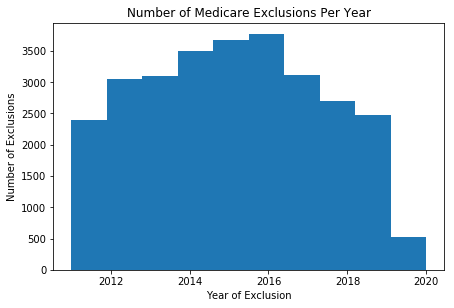

In [24]:
#Number of exclusions based on frauds per year
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(leie_2011_clean['EXCLYear'], bins=10, range=(leie_2011_clean['EXCLYear'].min(),leie_2011_clean['EXCLYear'].max()))
plt.title('Number of Medicare Exclusions Per Year')
plt.xlabel('Year of Exclusion')
plt.ylabel('Number of Exclusions')
plt.show()

In [25]:
#Exploring most common states excluded
leie_2011_clean['STATE'].value_counts()

CA    3149
FL    3056
TX    1994
OH    1493
NY    1396
PA    1130
IL     919
AZ     870
NC     786
LA     727
AL     693
TN     672
MS     647
KY     638
OK     600
IN     589
MA     589
OR     468
GA     443
WA     440
AR     424
MN     416
WV     390
MI     390
IA     389
CO     387
VA     384
MO     372
NJ     338
WI     277
UT     265
KS     257
ME     250
MD     247
NV     227
SC     214
CT     212
VT     181
AK     162
RI     156
NH     131
ID     125
NE     122
PR      92
NM      90
DE      86
WY      84
ND      81
SD      80
MT      78
HI      54
DC      16
XX      10
FM       2
GU       1
VI       1
Name: STATE, dtype: int64

In [26]:
#Looking at types of exclusions per year
excltype_years = pd.pivot_table(leie_2011_clean, 'NPI', index='EXCLYear', columns ='excl_type', aggfunc='count')
excltype_years.head(10)

excl_type,1128Aa,1128a1,1128a2,1128a3,1128a4,1128b1,1128b14,1128b15,1128b16,1128b2,1128b3,1128b4,1128b5,1128b6,1128b7,1128b8,1156,BRCH CI,BRCH SA
EXCLYear,,,,,,,,,,,,,,,,,,,
2011,1.0,942.0,196.0,204.0,111.0,6.0,56.0,3.0,NaN,3.0,1.0,816.0,22.0,NaN,9.0,20.0,NaN,NaN,NaN
2012,NaN,936.0,215.0,274.0,97.0,16.0,50.0,1.0,2.0,2.0,1.0,1414.0,16.0,NaN,22.0,11.0,NaN,NaN,NaN
2013,NaN,1084.0,156.0,275.0,158.0,32.0,27.0,NaN,NaN,3.0,2.0,1321.0,15.0,NaN,21.0,5.0,NaN,NaN,NaN
2014,1.0,1301.0,225.0,335.0,146.0,36.0,38.0,NaN,1.0,4.0,2.0,1338.0,46.0,1.0,14.0,8.0,NaN,1.0,1.0
2015,NaN,1127.0,293.0,324.0,190.0,51.0,8.0,NaN,NaN,2.0,3.0,1595.0,38.0,NaN,40.0,6.0,NaN,3.0,NaN
2016,2.0,1412.0,283.0,243.0,153.0,42.0,52.0,NaN,NaN,1.0,7.0,1484.0,49.0,NaN,25.0,4.0,1.0,NaN,5.0
2017,NaN,1294.0,255.0,245.0,187.0,49.0,25.0,3.0,NaN,2.0,12.0,896.0,94.0,2.0,31.0,12.0,1.0,NaN,NaN
2018,NaN,1017.0,214.0,229.0,131.0,32.0,32.0,NaN,NaN,1.0,4.0,977.0,20.0,2.0,29.0,8.0,NaN,1.0,2.0
2019,NaN,1176.0,229.0,309.0,181.0,34.0,22.0,1.0,NaN,NaN,4.0,471.0,20.0,2.0,23.0,4.0,NaN,1.0,NaN


In [27]:
#Saving file as a new CSV as this is what the team will work on moving forward
leie_2011_clean.to_csv('LEIE_filtered.csv', index=False)